# Зависимые выборки

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels as sts


# Реклама

Фокус-группу из потенциальных покупателей спрашивают, купят ли они товар. После им показывают 30 секундный видео-ролик, в котором объясняется как этот товар поменяет их жизнь. Каждого из них снова спрашивают, купит ли он товар. Нужно проверить гипотезу о том, что ролик повлиял на мнение людей. 

In [5]:
df = pd.DataFrame([[30, 15], [9, 51]])
df.columns = ['yes', 'no']
df.index = ['yes', 'no']

df

,yes,no
yes,30,15
no,9,51


In [7]:
df2 = pd.DataFrame([['a', 'b'], ['c', 'd']])
df2.columns = ['yes', 'no']
df2.index = ['yes', 'no']

df2

,yes,no
yes,a,b
no,c,d


$H_0 : p_1 = p_2$ ролик не повлиял на готовность купить товар

$H_a : p_1 != p_2$ ролик повлиял на готовность купить товар

In [17]:
df.loc['no', 'yes']

9

In [15]:
def proportions_diff_z_stat_rel(df):
    n = df.sum().sum()
    c = df.loc['no', 'yes']
    b = df.loc['yes', 'no']
    
    print(c)
    print(b)
    return (c-b)/np.sqrt(c+b-(c-b)**2/n)

In [16]:
z_obs = proportions_diff_z_stat_rel(df)
z_obs

9
15


-1.2335879094879223

In [14]:
alpha = 0.05
z_crit = stats.norm.ppf(alpha/2)

print(f'{z_obs:.5}, наблюдаемая больше критического {z_crit:.5} => гипотеза не отвергается')

-1.2336, наблюдаемая больше критического -1.96 => гипотеза не отвергается


# Контрольная работа
В файле `cr.csv` лежат результеты контрольной работы, которая проводилась в Вышке на факультете "Э".  По мнению студентов эти оценки смещённые, несостоятельные и ужасно неэффективные.

In [19]:
df = pd.read_csv('./data/cr.csv', sep='\t')
df.head()

,contest_login,fraud,k1a,k1b,k1c,k1d,k1e,k1f,k1,k2a,k2b,k2c,k2d,k2e,k2f,k2,k3a,k3b,k3c,k3
0,eds_python_2020_1,0.0,10.0,10.0,20.0,30.0,4.0,22.0,10.1,20.0,10.0,20.0,20.0,20.0,20.0,11.0,35.0,0.0,27.0,6.2
1,eds_python_2020_2,1.0,9.0,10.0,20.0,NaN,16.0,12.0,6.7,NaN,5.0,NaN,20.0,20.0,20.0,6.5,35.0,29.0,22.0,8.6
2,eds_python_2020_3,0.0,2.0,10.0,20.0,NaN,20.0,30.0,8.2,20.0,5.0,NaN,20.0,20.0,20.0,8.5,28.0,2.0,0.0,3.0
3,eds_python_2020_4,1.0,10.0,10.0,20.0,NaN,16.0,14.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,30.0,38.0,0.0,6.8
4,eds_python_2020_5,2.0,10.0,10.0,12.0,0.0,16.0,22.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,0.0,0.0,0.0,0.0


Правда ли, что в среднем их успеваемость не изменилась? 

In [21]:
d = df.k2.fillna(0) - df.k1.fillna(0)
d.size

389

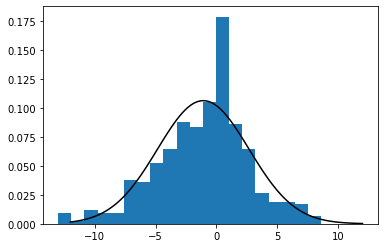

In [27]:
d_mean = d.mean()
d_std = d.std(ddof=1)

plt.hist(d, bins=20, density=True)

xs = np.linspace(-12, 12, 100)
ys = stats.norm(loc=d_mean, scale=d_std).pdf(xs)
plt.plot(xs, ys, color='Black')

In [28]:
# тест для разностей
stats.ttest_1samp(d, 0)


Ttest_1sampResult(statistic=-5.678488097412358, pvalue=2.6673273264469826e-08)

In [29]:
# тест для зависимых выборок
x = df.k2.fillna(0)
y = df.k1.fillna(0)

stats.ttest_rel(x, y)

Ttest_relResult(statistic=-5.678488097412358, pvalue=2.6673273264469826e-08)

In [30]:
# гипотеза, что успеваемость студентов не изменилась - отвергается